<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Keras_Functional_API_Inception_model_%2B_Res_model_%2B_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import layers
from keras.layers import Dense, Input, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, concatenate
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical, plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import cifar10 
import keras

In [0]:
## THE DATASET PART ##
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
## DEFINING THE MODEL ##

def model(input_shape):
  
  X_input = Input(input_shape)
  
  X1 = Conv2D(32, (2,2), strides = (1,1),padding = "same", name = "conv0")(X_input)
  X1 = BatchNormalization(axis = 3, name = "bn0")(X1)  
  X1 = Activation("relu")(X1)  
  X1 = Conv2D(32, (3,3), strides = (1,1),padding = "same", name = "conv1")(X1) 
  X1 = BatchNormalization(axis = 3, name = "bn1")(X1) 
  X1 = Activation("relu")(X1)
  X1 = Conv2D(32, (2,2), strides = (1,1), padding = "same", name = "conv2")(X1)
  X1 = BatchNormalization(axis = 3, name = "bn2")(X1)
  X1 = Activation("relu")(X1)
  
  X2 = Conv2D(32, (1,1), strides = (1,1),padding = "same", name = "conv3")(X_input)  
  X2 = BatchNormalization(axis = 3, name = "bn3")(X2)
  X2 = Activation("relu")(X2) 
  X2 = Conv2D(32, (5,5), strides = (1,1),padding = "same", name = "conv4")(X2)  
  X2 = BatchNormalization(axis = 3, name = "bn4")(X2)
  X2 = Activation("relu")(X2)
  X2 = Conv2D(32, (5,5), strides = (1,1),padding = "same", name = "conv5")(X2)  
  X2 = BatchNormalization(axis = 3, name = "bn5")(X2)
  X2 = Activation("relu")(X2)
  
  X3 = MaxPooling2D((1,1), strides = (1,1), name = "max_pool0")(X_input)
  X3 = Conv2D(32, (5,5), strides = (1,1), padding = "same", name = "conv6")(X3)
  X3 = BatchNormalization()(X3)
  X3 = Activation("relu")(X3)
  
  X = keras.layers.concatenate([X1,X2,X3])
  
  X4 = Conv2D(32, (5,5), strides = (1,1), padding = "same", name = "conv7")(X_input)
  X4 = BatchNormalization()(X4)
  X4 = Activation("relu")(X4)
  X5 = Conv2D(32, (4,4), strides = (1,1), padding = "same",name = "conv8" )(X)
  X5 = BatchNormalization()(X5)
  X5 = Activation("relu")(X5)  
  
  Y2 = keras.layers.concatenate([X4,X5])
  
  F1 = Conv2D(32, (5,5), strides = (1,1), padding = "same", name = "conv9")(Y2)
  F1 = BatchNormalization()(F1)
  F1 = Activation("relu")(F1)
  
  top = keras.layers.concatenate([X,Y2,F1])
  
  P1 = Conv2D(32, (7,7), strides = (1,1), padding = "same", name = "conv10")(Y2)
  P1 = BatchNormalization()(P1)
  P1 = Activation("relu")(P1)
  P2 = Conv2D(64, (8,8), strides = (1,1), padding = "same", name = "conv11")(P1)
  P2 = BatchNormalization()(P2)
  P2 = Activation("relu")(P2)
  
  last = keras.layers.concatenate([top,P1,P2])
  
  X = Flatten()(last)
  X = Dense(32, activation = "relu", name = "d1")(X)
  X = BatchNormalization()(X)
  
  X = Dense(10, activation = "softmax", name = "fc")(X)
  
  
  model = Model(inputs = X_input, outputs = X)
  return model

In [0]:
model = model(X_train.shape[1:])

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [46]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 32)   416         input_10[0][0]                   
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, 32, 32, 32)   128         input_10[0][0]                   
__________________________________________________________________________________________________
bn0 (BatchNormalization)        (None, 32, 32, 32)   128         conv0[0][0]                      
__________________________________________________________________________________________________
bn3 (Batch

In [0]:
model.load_weights("model.h5")

In [0]:
model.compile("adam", "categorical_crossentropy", metrics = ["accuracy"])

In [58]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 50, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 74s 1ms/step - loss: 0.0477 - acc: 0.9835 - val_loss: 1.8342 - val_acc: 0.6924
Epoch 2/5
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0414 - acc: 0.9862 - val_loss: 1.3536 - val_acc: 0.7597
Epoch 3/5
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0361 - acc: 0.9875 - val_loss: 1.3113 - val_acc: 0.7471
Epoch 4/5
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0298 - acc: 0.9897 - val_loss: 1.3214 - val_acc: 0.7516
Epoch 5/5
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0308 - acc: 0.9889 - val_loss: 1.2591 - val_acc: 0.7628


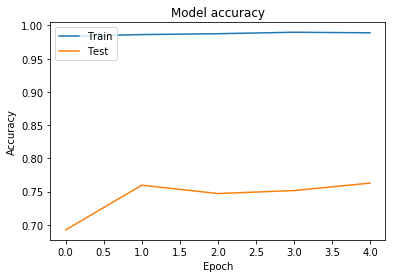

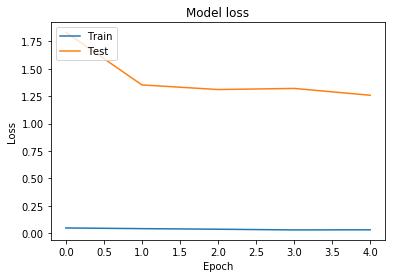

In [59]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save_weights("model.h5")